In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, classification_report, average_precision_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import shap
from imblearn.over_sampling import BorderlineSMOTE, SMOTE

c:\Users\DELL\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

# Update the path based on where you have the file in your Google Drive
df = pd.read_csv("D:/Swinburne/Sem 4/Technology Application Project/default/CLient_Data.csv")
# Display the first few rows
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...          0          0          0         0       689         0   
1  ...       3272       3455       3261         0      1000      1000   
2  ...      14331      14948      15549      1518      1500      1000   
3  ...      28314      28959      29547      2000      2019      1200   
4  ...      20940      19146      19131      2000     36681     10000   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default payment next month  
0         0         0   

In [4]:
import shap

# 1. Data Preparation

In [5]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
print(df.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


In [9]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

In [11]:
# Example of outlier removal in LIMIT_BAL using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df['LIMIT_BAL']))
df = df[z_scores < 3]  # Threshold is 3 standard deviations

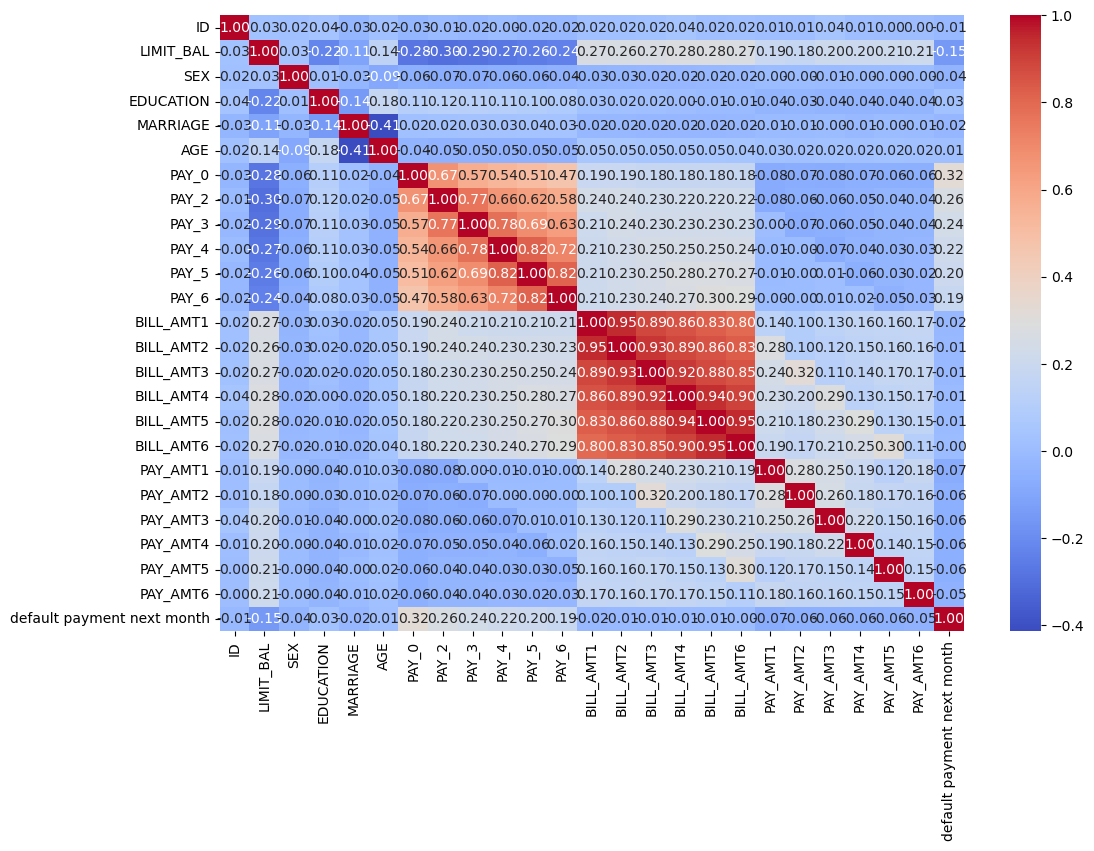

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


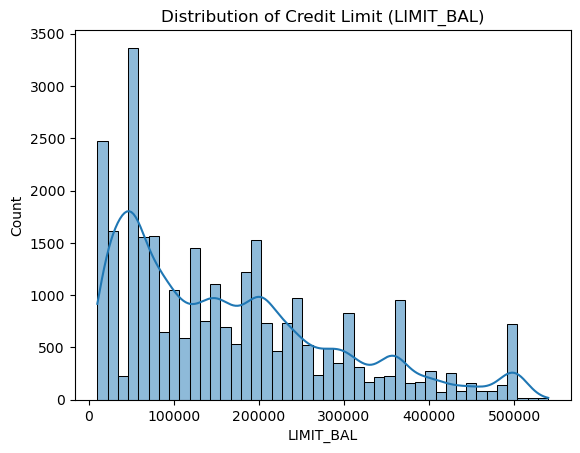

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Distribution of LIMIT_BAL
sns.histplot(df['LIMIT_BAL'], kde=True)
plt.title("Distribution of Credit Limit (LIMIT_BAL)")
plt.show()

In [13]:
# Assume 'default payment next month' is the target column in your dataset, where 1 indicates fraud and 0 indicates non-fraud.
no_fraud_count = df[df['default payment next month'] == 0].shape[0]
fraud_count = df[df['default payment next month'] == 1].shape[0]

# Calculate the proportions
total_count = no_fraud_count + fraud_count
no_fraud_proportion = no_fraud_count / total_count
fraud_proportion = fraud_count / total_count

# Display the counts and proportions
print(f"Non-Fraud Count: {no_fraud_count}")
print(f"Fraud Count: {fraud_count}")
print(f"Non-Fraud Proportion: {no_fraud_proportion:.2%}")
print(f"Fraud Proportion: {fraud_proportion:.2%}")

Non-Fraud Count: 23231
Fraud Count: 6618
Non-Fraud Proportion: 77.83%
Fraud Proportion: 22.17%


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


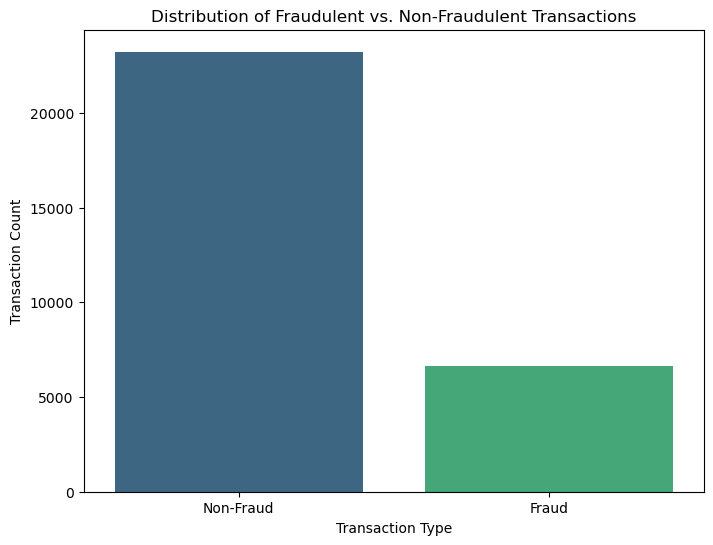

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
# Assuming 'default payment next month' column indicates fraud status (1 = fraud, 0 = non-fraud)
# and 'trans_date' indicates transaction date

# Bar Chart: Distribution of Fraud vs Non-Fraud Transactions
fraud_counts = df['default payment next month'].value_counts()
fraud_labels = ['Non-Fraud', 'Fraud']

plt.figure(figsize=(8, 6))
sns.barplot(x=fraud_labels, y=fraud_counts, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

# 1. Feature Engineering & Model Implement

In [15]:
# Average payment amount across billing cycles
df['avg_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis=1)

# Total payment amount across billing cycles
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)

# Average payment amount made
df['avg_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].mean(axis=1)

# Total payment amount made
df['total_pay_amt'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)

In [16]:
# Utilization for each billing month
for i in range(1, 7):
    df[f'credit_utilization_{i}'] = df[f'BILL_AMT{i}'] / df['LIMIT_BAL']

# Average credit utilization across billing cycles
df['avg_credit_utilization'] = df[[f'credit_utilization_{i}' for i in range(1, 7)]].mean(axis=1)

In [17]:
# Calculate delayed payment frequency
df['total_late_payments'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Average delay in payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Count of severe delays (over 2 months)
df['severe_delays'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x >= 2).sum(), axis=1)


In [18]:
# Trend in bill amounts (difference between consecutive billing cycles)
df['bill_amt_trend'] = df['BILL_AMT1'] - df['BILL_AMT6']

# Trend in payment amounts (difference between first and last payments)
df['pay_amt_trend'] = df['PAY_AMT1'] - df['PAY_AMT6']

# Difference between payment and bill amounts to measure ability to cover bills
df['pay_vs_bill_trend'] = df['total_pay_amt'] - df['total_bill_amt']

In [19]:
# Average Delay in Payments
df['avg_delay'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)

# Total Number of Defaults
df['total_defaults'] = df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].apply(lambda x: (x > 0).sum(), axis=1)

# Payment Trends (Example: Ratio of last to first payment amount)
df['payment_trend'] = df['PAY_AMT6'] / (df['PAY_AMT1'] + 1)  # Adding 1 to avoid division by zero

In [20]:
# Ratio of average payment to credit limit
df['payment_limit_ratio'] = df['avg_pay_amt'] / df['LIMIT_BAL']

# Ratio of total payments to total bills
df['pay_bill_ratio'] = df['total_pay_amt'] / (df['total_bill_amt'] + 1)  # +1 to avoid division by zero

# Ratio of average delay to age (normalized delay)
df['delay_age_ratio'] = df['avg_delay'] / (df['AGE'] + 1)

In [21]:
# Difference between credit limit and most recent bill amount
df['limit_vs_recent_bill'] = df['LIMIT_BAL'] - df['BILL_AMT1']

# Difference between most recent bill and previous bill
df['recent_bill_difference'] = df['BILL_AMT1'] - df['BILL_AMT2']

# Difference between most recent payment and previous payment
df['recent_payment_difference'] = df['PAY_AMT1'] - df['PAY_AMT2']

In [22]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,pay_amt_trend,pay_vs_bill_trend,total_defaults,payment_trend,payment_limit_ratio,pay_bill_ratio,delay_age_ratio,limit_vs_recent_bill,recent_bill_difference,recent_payment_difference
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,-7015,2,0.000000,0.005742,0.089422,-0.013333,16087,811,-689
1,2,120000,2,2,2,26,-1,2,0,0,...,-2000,-12077,2,2000.000000,0.006944,0.292774,0.018519,117318,957,-1000
2,3,90000,2,2,2,34,0,0,0,0,...,-3482,-90635,0,3.291639,0.020404,0.108387,0.000000,60761,15212,18
3,4,50000,2,2,1,37,0,0,0,0,...,1000,-222946,0,0.499750,0.027960,0.036259,0.000000,3010,-1243,-19
4,5,50000,1,2,1,57,-1,0,-1,0,...,1321,-50290,0,0.339330,0.196830,0.540049,-0.005747,41383,2947,-34681


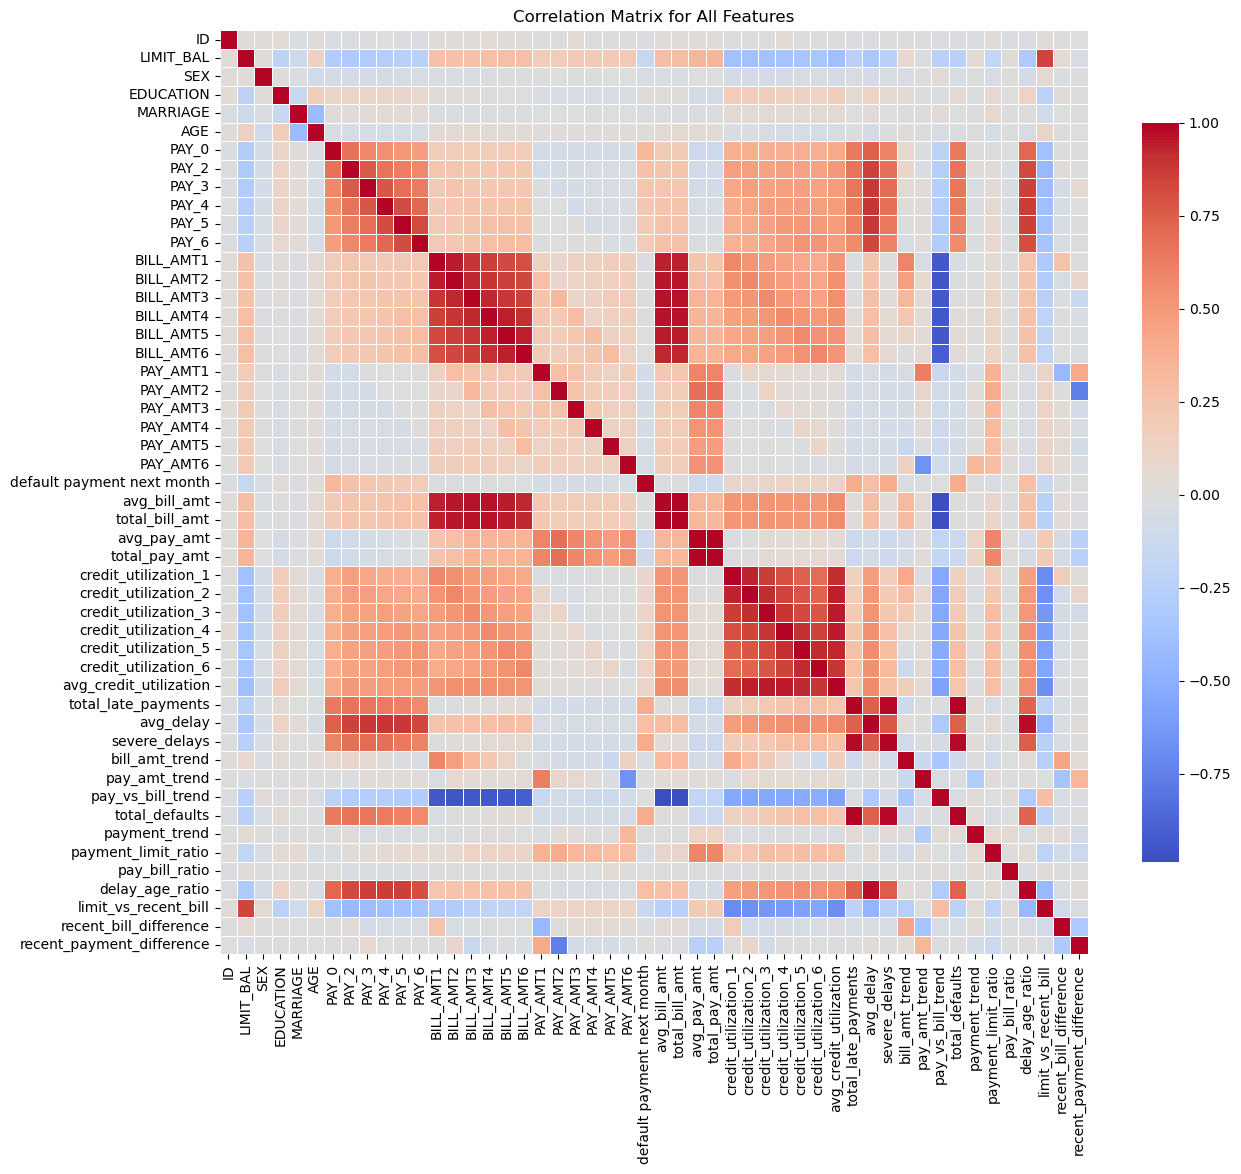

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix for All Features')
plt.show()

In [24]:
correlation_matrix

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,pay_amt_trend,pay_vs_bill_trend,total_defaults,payment_trend,payment_limit_ratio,pay_bill_ratio,delay_age_ratio,limit_vs_recent_bill,recent_bill_difference,recent_payment_difference
ID,1.000000,0.026295,0.018927,0.038823,-0.029545,0.018691,-0.030202,-0.010653,-0.018251,-0.002239,...,0.005136,-0.021183,-0.019912,-0.015438,0.021202,-0.017526,-0.019024,0.015295,0.005567,-0.002569
LIMIT_BAL,0.026295,1.000000,0.027930,-0.221403,-0.109971,0.142166,-0.276190,-0.302872,-0.292306,-0.272952,...,-0.026853,-0.241285,-0.238649,0.041195,-0.186594,0.015480,-0.300474,0.838587,0.047655,-0.037358
SEX,0.018927,0.027930,1.000000,0.013713,-0.032173,-0.090213,-0.058143,-0.071083,-0.066162,-0.060267,...,0.002562,0.025863,-0.043809,0.002496,-0.039600,0.007287,-0.068560,0.046507,-0.010070,0.001510
EDUCATION,0.038823,-0.221403,0.013713,1.000000,-0.143469,0.175667,0.105264,0.121665,0.114184,0.108859,...,0.003242,-0.021280,0.048057,-0.016414,0.052833,-0.009059,0.122970,-0.233984,0.017659,0.003238
MARRIAGE,-0.029545,-0.109971,-0.032173,-0.143469,1.000000,-0.413961,0.020107,0.024361,0.032834,0.033317,...,0.000382,0.022173,-0.008166,0.001205,0.063753,0.000501,0.017143,-0.096655,-0.008084,0.003526
AGE,0.018691,0.142166,-0.090213,0.175667,-0.413961,1.000000,-0.039171,-0.050207,-0.053216,-0.049714,...,0.004509,-0.046475,-0.015206,0.004836,-0.049498,0.004427,-0.036279,0.111446,0.011503,-0.002963
PAY_0,-0.030202,-0.276190,-0.058143,0.105264,0.020107,-0.039171,1.000000,0.671621,0.573612,0.538411,...,-0.013359,-0.222474,0.635612,0.013698,-0.013032,-0.008864,0.716643,-0.380925,0.012118,0.012518
PAY_2,-0.010653,-0.302872,-0.071083,0.121665,0.024361,-0.050207,0.671621,1.000000,0.766161,0.661708,...,-0.031953,-0.267217,0.661553,0.024192,0.015897,-0.025877,0.825361,-0.434693,0.024786,0.001203
PAY_3,-0.018251,-0.292306,-0.066162,0.114184,0.032834,-0.053216,0.573612,0.766161,1.000000,0.777250,...,0.030017,-0.261622,0.654097,-0.034926,0.037948,-0.025330,0.854194,-0.408819,-0.068548,0.063614
PAY_4,-0.002239,-0.272952,-0.060267,0.108859,0.033317,-0.049714,0.538411,0.661708,0.777250,1.000000,...,0.014473,-0.268508,0.634848,-0.024241,0.057595,-0.025005,0.867019,-0.387226,-0.050842,-0.004060


In [25]:
# Separate features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [26]:
# Train an XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Get feature importances
xgb_feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("XGBoost Feature Importances:")
print(xgb_feature_importances)

c:\Users\DELL\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [00:39:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Feature Importances:
severe_delays                0.263202
total_late_payments          0.197495
PAY_0                        0.142906
avg_pay_amt                  0.014536
avg_bill_amt                 0.014047
PAY_2                        0.012998
limit_vs_recent_bill         0.012947
BILL_AMT1                    0.011161
avg_credit_utilization       0.010325
credit_utilization_1         0.010225
credit_utilization_2         0.010111
pay_bill_ratio               0.010054
PAY_AMT1                     0.009795
EDUCATION                    0.009700
LIMIT_BAL                    0.009535
delay_age_ratio              0.009479
pay_vs_bill_trend            0.009420
bill_amt_trend               0.009402
BILL_AMT5                    0.009388
recent_bill_difference       0.009185
payment_limit_ratio          0.009173
BILL_AMT4                    0.009084
BILL_AMT6                    0.009074
credit_utilization_5         0.008933
PAY_AMT2                     0.008928
credit_utilization_6 

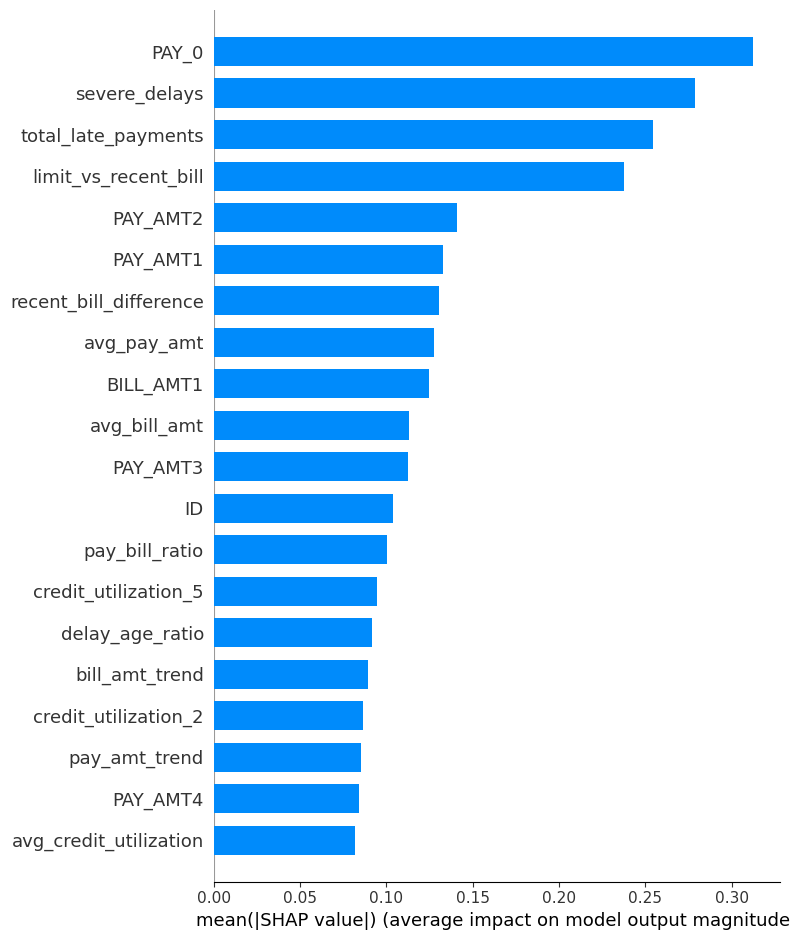

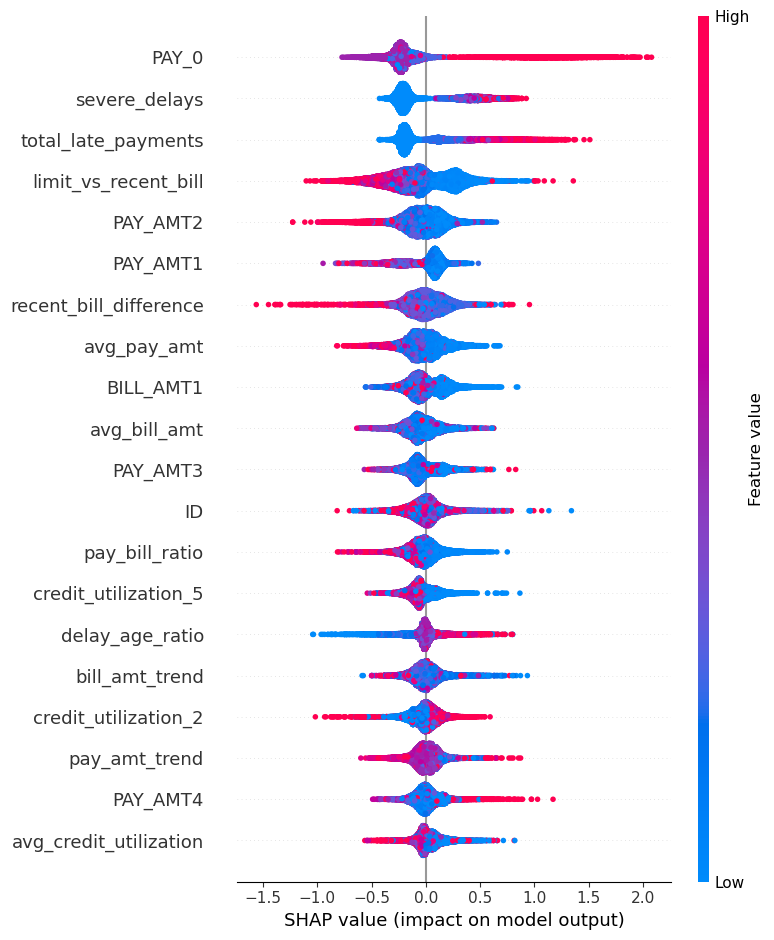

In [27]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# Summary plot of SHAP values to show feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Detailed SHAP summary plot (to see the effect of each feature on predictions)
shap.summary_plot(shap_values, X_train)

In [28]:
shap_importances = pd.DataFrame(list(zip(X.columns, shap_values.mean(0).tolist())), columns=["Feature", "Mean SHAP Value"])
shap_importances = shap_importances.sort_values(by="Mean SHAP Value", ascending=False)

print("SHAP Feature Importances:")
print(shap_importances)

SHAP Feature Importances:
                      Feature  Mean SHAP Value
30       credit_utilization_3         0.033566
34     avg_credit_utilization         0.028435
33       credit_utilization_6         0.025383
21                   PAY_AMT4         0.013146
15                  BILL_AMT4         0.011526
16                  BILL_AMT5         0.010911
9                       PAY_4         0.010493
1                   LIMIT_BAL         0.007429
39              pay_amt_trend         0.004354
40          pay_vs_bill_trend         0.001667
12                  BILL_AMT1         0.001220
17                  BILL_AMT6         0.001051
8                       PAY_3         0.000893
38             bill_amt_trend         0.000535
43        payment_limit_ratio         0.000529
27              total_pay_amt         0.000000
41             total_defaults         0.000000
25             total_bill_amt         0.000000
4                    MARRIAGE        -0.000555
2                         SEX     

In [29]:
# Step 4: Compare XGBoost Feature Importances and SHAP Feature Importances
# Identify the best feature based on both methods

best_feature_xgb = xgb_feature_importances.idxmax()
best_feature_shap = shap_importances['Feature'].iloc[0]

print(f"Best Feature according to XGBoost: {best_feature_xgb}")
print(f"Best Feature according to SHAP: {best_feature_shap}")

Best Feature according to XGBoost: severe_delays
Best Feature according to SHAP: credit_utilization_3


Top 5 Features according to XGBoost:
severe_delays          0.263202
total_late_payments    0.197495
PAY_0                  0.142906
avg_pay_amt            0.014536
avg_bill_amt           0.014047
dtype: float32
Top 5 Features according to SHAP:
                   Feature  Mean SHAP Value
30    credit_utilization_3         0.033566
34  avg_credit_utilization         0.028435
33    credit_utilization_6         0.025383
21                PAY_AMT4         0.013146
15               BILL_AMT4         0.011526


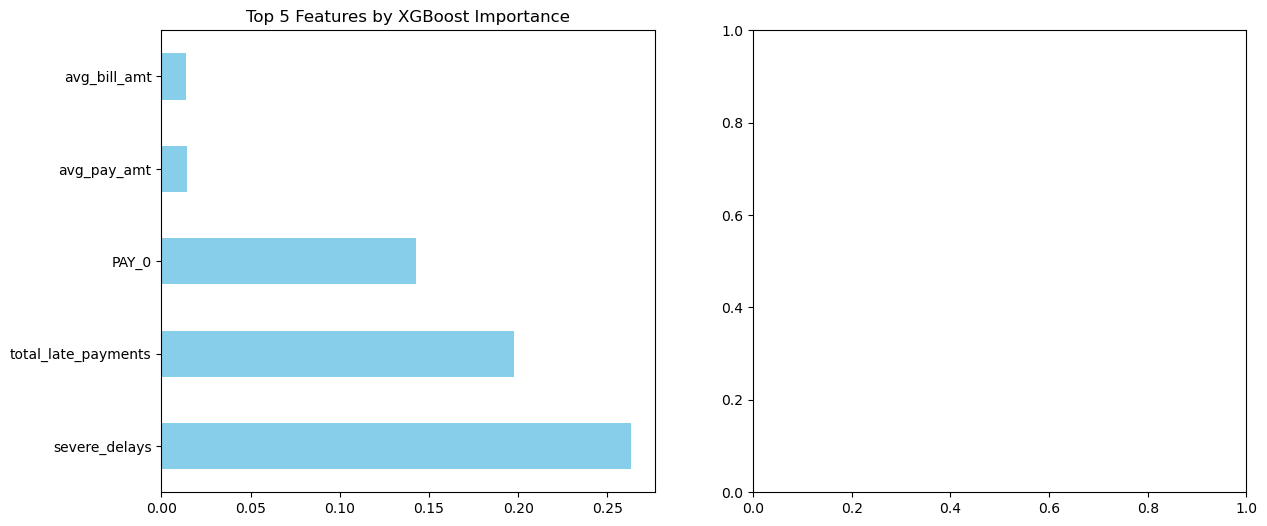

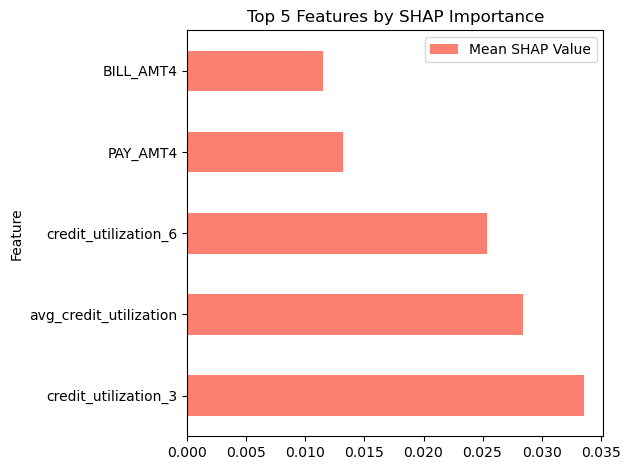

In [30]:
# Top 5 features according to XGBoost (highest importance)
top_5_features_xgb = xgb_feature_importances.head(5)
print("Top 5 Features according to XGBoost:")
print(top_5_features_xgb)

# Top 5 features according to SHAP (highest mean SHAP value)
top_5_features_shap = shap_importances.head(5)
print("Top 5 Features according to SHAP:")
print(top_5_features_shap)

# Step 5: Plot the top 5 features from XGBoost and SHAP for comparison
plt.figure(figsize=(14, 6))

# Plot XGBoost Top 5 Features
plt.subplot(1, 2, 1)
top_5_features_xgb.plot(kind='barh', color='skyblue')
plt.title('Top 5 Features by XGBoost Importance')

# Plot SHAP Top 5 Features
plt.subplot(1, 2, 2)
top_5_features_shap.plot(kind='barh', x='Feature', y='Mean SHAP Value', color='salmon')
plt.title('Top 5 Features by SHAP Importance')

plt.tight_layout()
plt.show()

In [31]:
X = df.drop(columns=['default payment next month'])  # Remove the target column from features
y = df['default payment next month']

In [32]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,pay_amt_trend,pay_vs_bill_trend,total_defaults,payment_trend,payment_limit_ratio,pay_bill_ratio,delay_age_ratio,limit_vs_recent_bill,recent_bill_difference,recent_payment_difference
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,-7015,2,0.000000,0.005742,0.089422,-0.013333,16087,811,-689
1,2,120000,2,2,2,26,-1,2,0,0,...,-2000,-12077,2,2000.000000,0.006944,0.292774,0.018519,117318,957,-1000
2,3,90000,2,2,2,34,0,0,0,0,...,-3482,-90635,0,3.291639,0.020404,0.108387,0.000000,60761,15212,18
3,4,50000,2,2,1,37,0,0,0,0,...,1000,-222946,0,0.499750,0.027960,0.036259,0.000000,3010,-1243,-19
4,5,50000,1,2,1,57,-1,0,-1,0,...,1321,-50290,0,0.339330,0.196830,0.540049,-0.005747,41383,2947,-34681


In [33]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

# Best result - 94%

In [34]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Train the Base Classifier
base_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
base_model.fit(X_train_scaled, y_train)

# Get predictions from the base classifier
y_pred_base = base_model.predict(X_test_scaled)

# Evaluate the base classifier
print("Base Model Classification Report:")
print(classification_report(y_test, y_pred_base))

# Step 2: Identify False Positives
false_positives_idx = np.where((y_pred_base == 1) & (y_test == 0))[0]
X_test_false_positives = X_test_scaled[false_positives_idx]
y_test_false_positives = y_test.iloc[false_positives_idx]

# Step 3: Train a Secondary Classifier
secondary_model = XGBClassifier(random_state=42)
secondary_model.fit(X_train_scaled, y_train)

# Re-classify the false positives
y_pred_secondary = secondary_model.predict(X_test_false_positives)

# Step 4: Combine Predictions
final_predictions = y_pred_base.copy()
final_predictions[false_positives_idx] = y_pred_secondary

# Evaluate the Cascade Model
print("Cascade Model Classification Report:")
print(classification_report(y_test, final_predictions))


Base Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      6970
           1       0.46      0.54      0.50      1985

    accuracy                           0.76      8955
   macro avg       0.66      0.68      0.67      8955
weighted avg       0.77      0.76      0.77      8955

Cascade Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6970
           1       0.72      0.54      0.62      1985

    accuracy                           0.85      8955
   macro avg       0.80      0.74      0.76      8955
weighted avg       0.84      0.85      0.84      8955



Confusion Matrix for Base Model:


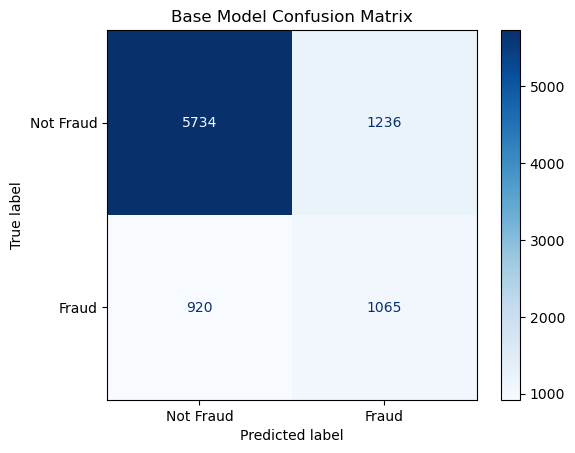

Confusion Matrix for Cascade Model:


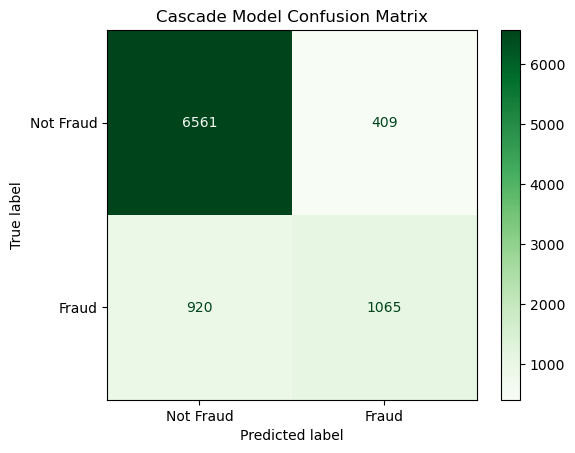

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Base Model
print("Confusion Matrix for Base Model:")
cm_base = confusion_matrix(y_test, y_pred_base)
disp_base = ConfusionMatrixDisplay(confusion_matrix=cm_base, display_labels=["Not Fraud", "Fraud"])
disp_base.plot(cmap="Blues")
plt.title("Base Model Confusion Matrix")
plt.show()

# Confusion Matrix for Cascade Model
print("Confusion Matrix for Cascade Model:")
cm_cascade = confusion_matrix(y_test, final_predictions)
disp_cascade = ConfusionMatrixDisplay(confusion_matrix=cm_cascade, display_labels=["Not Fraud", "Fraud"])
disp_cascade.plot(cmap="Greens")
plt.title("Cascade Model Confusion Matrix")
plt.show()


# Model Explainability:

### Step 1: SHAP Analysis for Base Model


SHAP Analysis for Base Model
Global Explanation for Base Model:


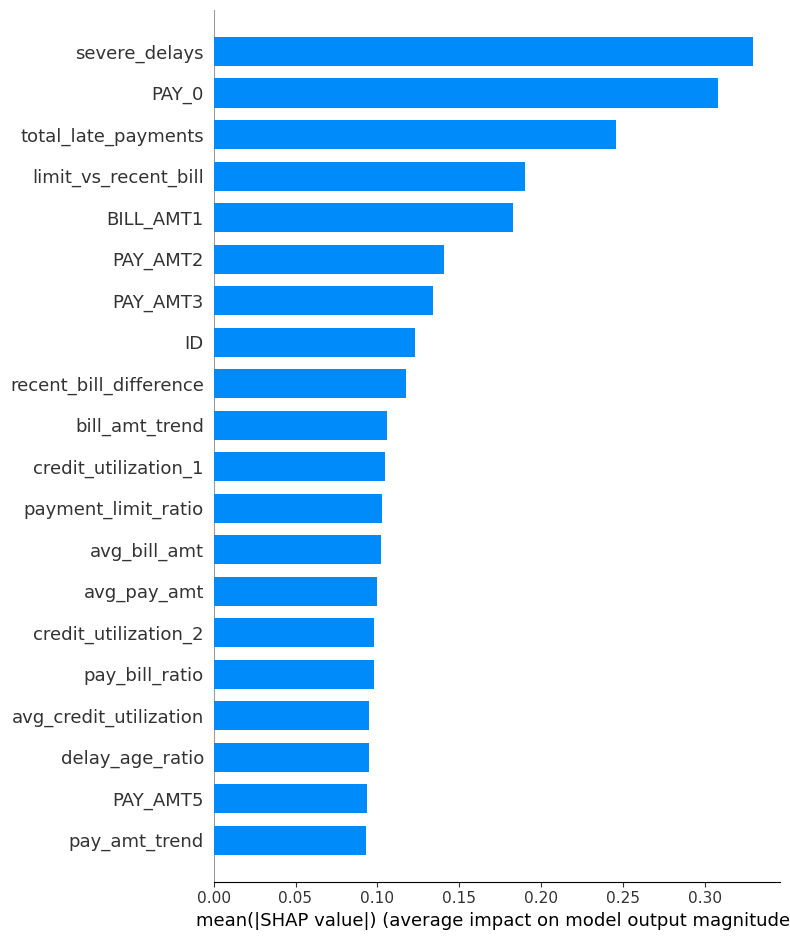

In [36]:
# Step 1: SHAP Analysis for Base Model
print("SHAP Analysis for Base Model")

# Initialize SHAP TreeExplainer for the base model
explainer_base = shap.TreeExplainer(base_model)

# Calculate SHAP values for the test set
shap_values_base = explainer_base.shap_values(X_test_scaled)

# Overall (Global) Explanation for Base Model
print("Global Explanation for Base Model:")
shap.summary_plot(shap_values_base, X_test_scaled, plot_type="bar", feature_names=X.columns)

# Individual Explanation for a Specific Index in Base Model
index_of_interest = 42  # Replace with the index you want to analyze
shap.force_plot(
    explainer_base.expected_value,
    shap_values_base[index_of_interest],
    X_test_scaled[index_of_interest],
    feature_names=X.columns
)

### Step 2: SHAP Analysis for Secondary Model

SHAP Analysis for Secondary Model
Global Explanation for Secondary Model:


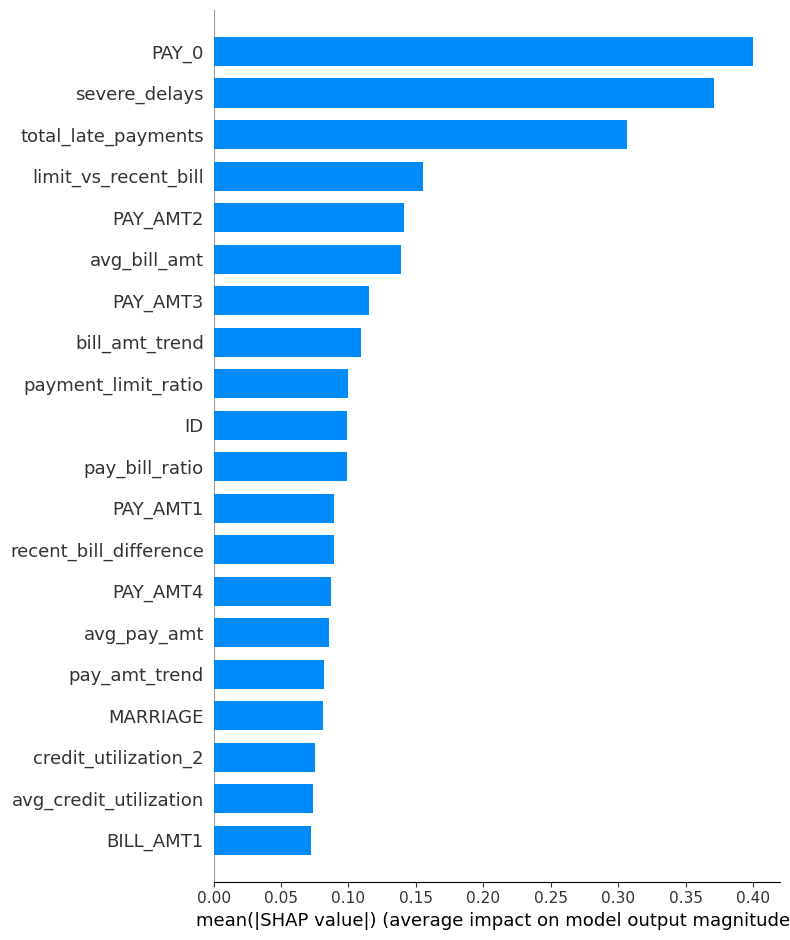

In [37]:
# Step 2: SHAP Analysis for Secondary Model
print("SHAP Analysis for Secondary Model")

# Initialize SHAP TreeExplainer for the secondary model
explainer_secondary = shap.TreeExplainer(secondary_model)

# Calculate SHAP values for the false positives reclassified by the secondary model
shap_values_secondary = explainer_secondary.shap_values(X_test_false_positives)

# Global Explanation for Secondary Model
print("Global Explanation for Secondary Model:")
shap.summary_plot(shap_values_secondary, X_test_false_positives, plot_type="bar", feature_names=X.columns)

# Individual Explanation for a Specific False Positive
if len(false_positives_idx) > 0:  # Ensure there are false positives
    false_positive_index = false_positives_idx[0]  # Choose the first false positive for analysis
    shap.force_plot(
        explainer_secondary.expected_value,
        shap_values_secondary[0],  # First instance of false positives
        X_test_false_positives[0],
        feature_names=X.columns
    )
else:
    print("No false positives detected for secondary model analysis.")

In [38]:
# 1. Select a random instance from the test set
random_idx = np.random.randint(0, X_test_scaled.shape[0])
instance = X_test_scaled[random_idx].reshape(1, -1)

# 2. Calculate SHAP values for the selected instance
shap_instance = explainer(instance)

# 3. Plot the SHAP explanation for the selected instance (local explanation)
shap.force_plot(shap_instance.base_values[0], shap_instance.values[0], instance, feature_names=X.columns)

Key Elements of the Force Plot
Base Value (-0.006906):

This is the average model output across all instances (the expected value of the model's predictions). It represents the baseline prediction if no features are used.
Model Output (-4.107):

The model's actual prediction for this specific instance. The value is calculated by adjusting the base value with the contributions of each feature.
Feature Contributions:

Each feature either pushes the model output higher (red arrows) or lower (blue arrows) from the base value. The size of the arrow represents the strength of the contribution.
Red Features (Positive Impact):

t_utilization_2 = 1.243: This feature significantly increases the prediction value.
BILL_AMT5 = -0.4734: This feature also contributes positively, but to a lesser extent.
Blue Features (Negative Impact):

PAY_AMT1 = 3.177: This strongly decreases the prediction, pulling it further down from the base value.
BILL_AMT2 = -0.04804, BILL_AMT6 = -0.6012, payment_limit_ratio = 9.298, and others: These also decrease the prediction, though with varying levels of influence.

In [39]:
# Retrieve the feature names
feature_names = X.columns

# Get the actual data (unscaled) for the random instance
instance_data = X_test.iloc[random_idx]

# Print the actual data (features) for the selected instance
print("Actual Data for the Selected Instance:")
print(instance_data)

# Optionally, print the corresponding SHAP values to understand how the model arrived at the prediction
shap_values_instance = explainer(instance)  # SHAP values for the selected instance
shap_values_instance_df = pd.DataFrame(shap_values_instance.values, columns=feature_names)


Actual Data for the Selected Instance:
ID                            24245.000000
LIMIT_BAL                    330000.000000
SEX                               1.000000
EDUCATION                         1.000000
MARRIAGE                          2.000000
AGE                              31.000000
PAY_0                             0.000000
PAY_2                             0.000000
PAY_3                             0.000000
PAY_4                            -1.000000
PAY_5                            -1.000000
PAY_6                             0.000000
BILL_AMT1                    165042.000000
BILL_AMT2                    163406.000000
BILL_AMT3                    137664.000000
BILL_AMT4                      3381.000000
BILL_AMT5                     40635.000000
BILL_AMT6                     40490.000000
PAY_AMT1                       9000.000000
PAY_AMT2                       7558.000000
PAY_AMT3                       5000.000000
PAY_AMT4                      42054.000000
PAY_AMT5       

In [40]:
# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[random_idx]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

Actual Label for the selected instance: 0
Model Prediction for the selected instance: 0


In [41]:
# Filter instances where both actual and predicted values are 1 (fraud cases)
fraud_indices = (y_test == 1) & (final_predictions == 1)

# Extract the corresponding data
X_fraud = X_test_scaled[fraud_indices]  # Scaled features for fraud instances
y_fraud = y_test[fraud_indices]         # Actual fraud labels for those instances

# Get the indices of the fraud cases
fraud_indices_list = np.where(fraud_indices)[0]

# Display the first 5 indices
print("Indices of the first 5 correctly predicted fraud cases:")
print(fraud_indices_list[:5])

Indices of the first 5 correctly predicted fraud cases:
[ 1  6 12 26 33]


In [42]:
# Specify the index of interest (replace with the desired index, e.g., 42)
index_of_interest = 3

# Check if the index is valid
if index_of_interest in y_test.index:
    # Extract the feature values and label for the specific instance
    X_instance = X_test_scaled[index_of_interest].reshape(1, -1)  # Scaled feature for the instance
    y_instance = y_test.iloc[index_of_interest]  # Actual label for the instance

    print(f"SHAP values for instance at index {index_of_interest}:")
    print(f"Actual label: {y_instance}")

    # Initialize SHAP explainer
    explainer = shap.TreeExplainer(secondary_model)  # Use the trained model (secondary_model)

    # Calculate SHAP values for the specific instance
    shap_values_instance = explainer.shap_values(X_instance)

    # Convert SHAP values into a DataFrame for better readability
    shap_values_df = pd.DataFrame({
        'Feature': X.columns,  # Replace `X.columns` with your feature names
        'SHAP Value': shap_values_instance[0],
        'Feature Value': X_test.iloc[index_of_interest].values
    })

    # Print the SHAP values DataFrame sorted by absolute SHAP value (importance)
    print(shap_values_df.sort_values(by='SHAP Value', ascending=False))

    # Visualize the SHAP values using a force plot
    shap.force_plot(
        explainer.expected_value,
        shap_values_instance[0],
        X_instance,
        feature_names=X.columns
    )
else:
    print(f"Index {index_of_interest} is not valid in the test dataset.")

SHAP values for instance at index 3:
Actual label: 1
                      Feature  SHAP Value  Feature Value
24               avg_bill_amt    0.491801     673.833333
19                   PAY_AMT2    0.295045    1131.000000
34     avg_credit_utilization    0.170049       0.005615
48  recent_payment_difference    0.136999    -253.000000
15                  BILL_AMT4    0.103975     441.000000
13                  BILL_AMT2    0.097491     878.000000
28       credit_utilization_1    0.091840       0.005925
18                   PAY_AMT1    0.082160     878.000000
29       credit_utilization_2    0.072343       0.007317
16                  BILL_AMT5    0.055304     441.000000
30       credit_utilization_3    0.042201       0.009425
23                   PAY_AMT6    0.042114     455.000000
32       credit_utilization_5    0.037372       0.003675
8                       PAY_3    0.033513      -1.000000
1                   LIMIT_BAL    0.020429  120000.000000
38             bill_amt_trend    0.

In [43]:
# 4. Get the actual label for the selected instance
actual_label = y_test.iloc[index_of_interest]

# 5. Get the predicted label for the selected instance
predicted_label = secondary_model.predict(instance)[0]

# 6. Print the actual and predicted results for the selected instance
print(f"Actual Label for the selected instance: {actual_label}")
print(f"Model Prediction for the selected instance: {predicted_label}")

Actual Label for the selected instance: 1
Model Prediction for the selected instance: 0


Overall SHAP Summary for Secondary Model


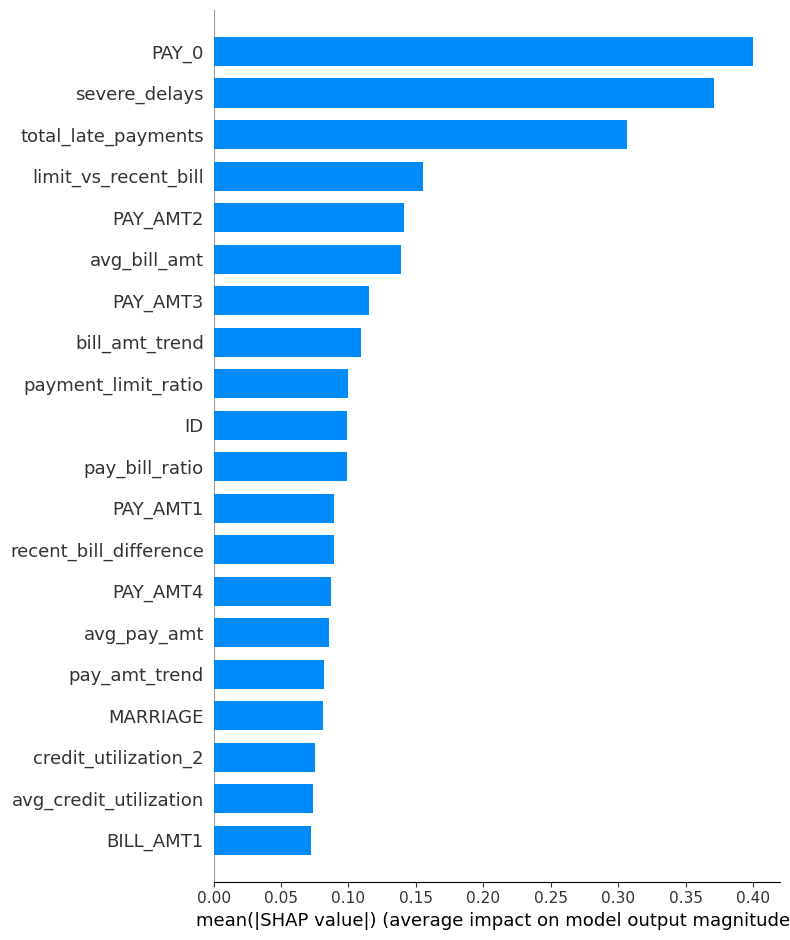

SHAP Force Plot for Instance at Index 3


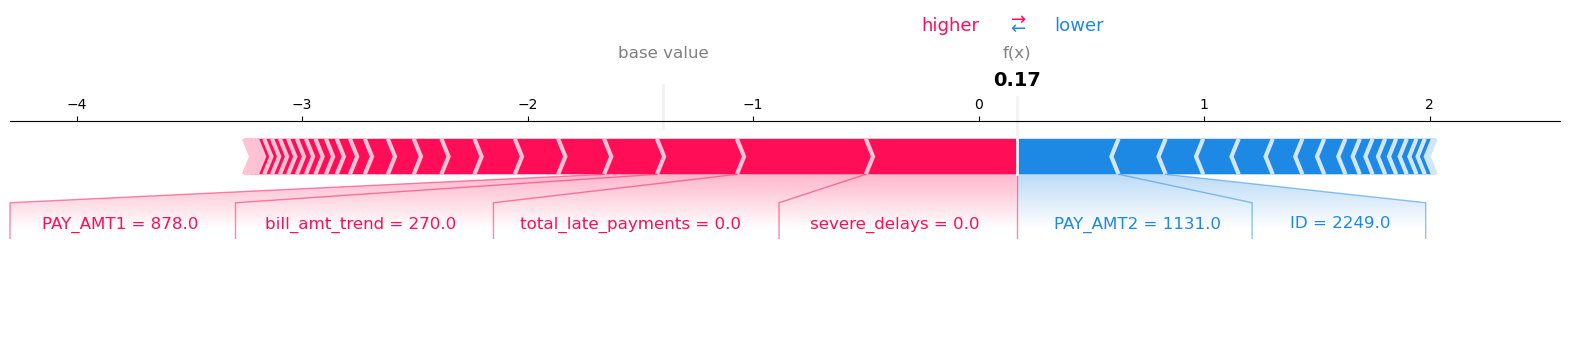

In [44]:
# Overall Feature Importance for the Secondary Model
print("Overall SHAP Summary for Secondary Model")

# Ensure the features have their actual names
shap.summary_plot(
    shap_values_secondary, 
    X_test,  # Use DataFrame with actual feature names
    plot_type="bar"
)

# Individual Explanation for the Secondary Model (same instance)
print(f"SHAP Force Plot for Instance at Index {index_of_interest}")
shap.force_plot(
    explainer_secondary.expected_value, 
    shap_values_secondary[index_of_interest], 
    X_test.iloc[index_of_interest],  # Feature values for the specific instance
    matplotlib=True
)

### Adjustment

In [45]:
# Step 1: Feature Selection Based on SHAP Insights
# Re-train a model to identify the most important features
feature_selector_model = XGBClassifier(random_state=42)
feature_selector_model.fit(X_train_scaled, y_train)

# Use SHAP feature importance to select the top features
shap_importance = np.abs(shap.TreeExplainer(feature_selector_model).shap_values(X_train_scaled)).mean(axis=0)
top_features_idx = np.argsort(shap_importance)[::-1][:10]  # Select top 10 features
X_train_selected = X_train_scaled[:, top_features_idx]
X_test_selected = X_test_scaled[:, top_features_idx]


In [46]:
# Step 2: SMOTE for Balancing the Data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_selected, y_train)

# Step 3: Hyperparameter Tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [len(y_train[y_train == 0]) / len(y_train[y_train == 1])]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'scale_pos_weight': [3.5098208504208936]},
             scoring='f1', verbose=1)

In [47]:
# Step 4: Evaluate the Best Model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_selected)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      6970
           1       0.34      0.70      0.46      1985

    accuracy                           0.63      8955
   macro avg       0.61      0.65      0.59      8955
weighted avg       0.76      0.63      0.66      8955

Confusion Matrix:
[[4215 2755]
 [ 588 1397]]


Overall Feature Importance:


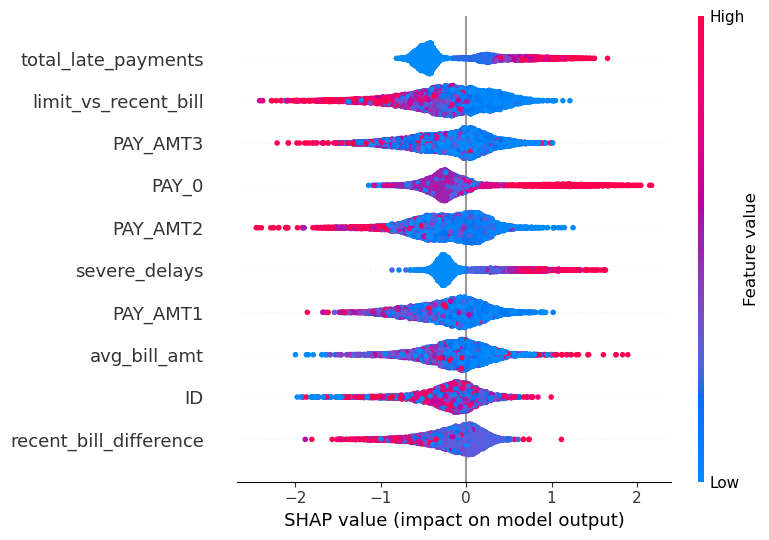

SHAP Explanation for Instance Index: 5


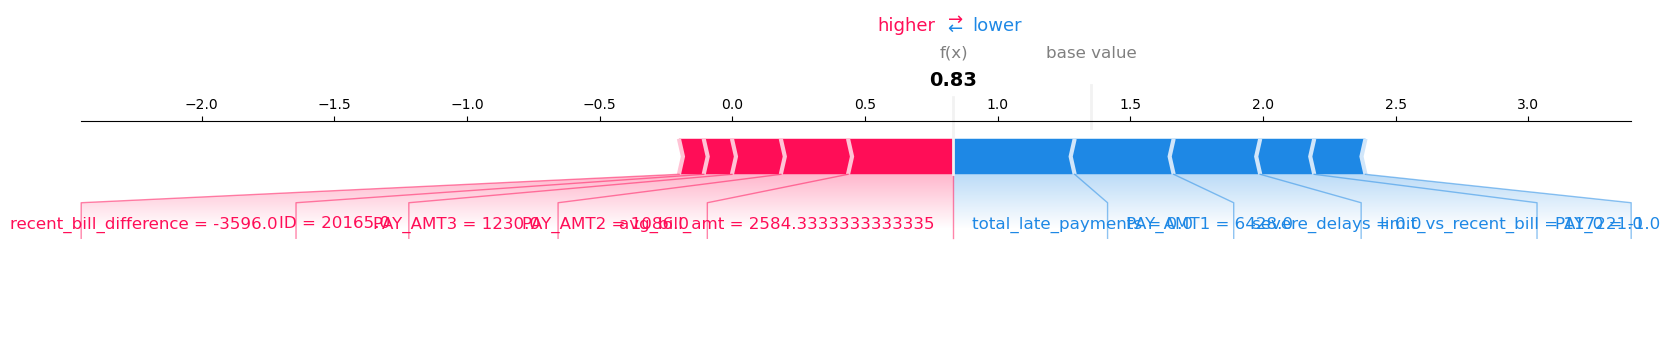

In [48]:
# Step 5: SHAP Analysis on the Best Model
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_selected)

# Overall SHAP Summary Plot
print("Overall Feature Importance:")
shap.summary_plot(shap_values, X_test_selected, feature_names=X.columns[top_features_idx])

# Individual Explanation for an Instance
index_of_interest = 5  # Example: choose an instance index
print("SHAP Explanation for Instance Index:", index_of_interest)
shap.force_plot(
    explainer.expected_value, 
    shap_values[index_of_interest], 
    X_test.iloc[index_of_interest, top_features_idx], 
    matplotlib=True
)

# Model Fairness

In [49]:
pip install fairlearn

  Using cached numpy-2.2.0-cp310-cp310-win_amd64.whl (12.9 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\DELL\\anaconda3\\Lib\\site-packages\\~-mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [50]:
import fairlearn

In [51]:
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import selection_rate, demographic_parity_difference, equalized_odds_difference

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29849 entries, 0 to 29999
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          29849 non-null  int64  
 1   LIMIT_BAL                   29849 non-null  int64  
 2   SEX                         29849 non-null  int64  
 3   EDUCATION                   29849 non-null  int64  
 4   MARRIAGE                    29849 non-null  int64  
 5   AGE                         29849 non-null  int64  
 6   PAY_0                       29849 non-null  int64  
 7   PAY_2                       29849 non-null  int64  
 8   PAY_3                       29849 non-null  int64  
 9   PAY_4                       29849 non-null  int64  
 10  PAY_5                       29849 non-null  int64  
 11  PAY_6                       29849 non-null  int64  
 12  BILL_AMT1                   29849 non-null  int64  
 13  BILL_AMT2                   29849 no

In [54]:
# Step 1: Load and Prepare the Dataset
# Assuming the data is in a DataFrame called `df`
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Sensitive attributes
sensitive_attribute = "SEX"  # You can replace this with "EDUCATION" or "MARRIAGE"

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model
secondary_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
secondary_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = secondary_model.predict(X_test_scaled)

# Step 3: Fairlearn Metric Analysis
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
}

# Use Fairlearn's MetricFrame to compute metrics by sensitive groups
metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test[sensitive_attribute],
)

print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Demographic Parity and Equalized Odds
dp_diff = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)
eo_diff = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

Fairness Metrics by Group:
     accuracy  precision    recall  selection_rate
SEX                                               
1    0.735619   0.457253  0.563981        0.294984
2    0.774604   0.467460  0.516214        0.232215
Demographic Parity Difference: 0.06276915498846533
Equalized Odds Difference: 0.0538355399394623


These metrics are part of **fairness analysis** performed on the model, and they measure how the model's performance and decisions vary across different demographic groups (here, based on the `SEX` feature). Let's break it down:

---

### **Fairness Metrics by Group**
This shows how the model performs for each group in the `SEX` feature (e.g., `SEX_0` and `SEX_1`):

1. **Accuracy**: The proportion of correctly classified instances in the group.
   - `SEX_0`: 74.21%
   - `SEX_1`: 77.87%

2. **Precision**: The proportion of positive predictions that are actually correct.
   - `SEX_0`: 46.74%
   - `SEX_1`: 47.56%

3. **Recall**: The proportion of actual positives that are correctly identified.
   - `SEX_0`: 56.04%
   - `SEX_1`: 51.18%

4. **Selection Rate**: The proportion of instances classified as positive in the group.
   - `SEX_0`: 28.68%
   - `SEX_1`: 22.63%

---

### **Fairness Metrics Summary**

1. **Demographic Parity Difference**:  
   This metric measures the difference in **selection rates** between the groups (here, `SEX_0` and `SEX_1`).  
   - A difference of **0.0604** indicates that the model selects `SEX_0` as positive at a rate 6.04% higher than `SEX_1`.  
   - Ideally, this should be close to zero for fairness, indicating that both groups have similar selection rates.

2. **Equalized Odds Difference**:  
   This measures the maximum difference in **true positive rates** and **false positive rates** between the groups.  
   - A difference of **0.0505** means there’s a 5.05% disparity in the ability of the model to equally identify or misclassify outcomes across the two groups.  
   - Lower values indicate better fairness.

---

### **Interpretation**
- **Group Disparities**: The model performs slightly better for `SEX_1` in terms of accuracy but has a higher recall for `SEX_0`. This indicates possible disparities in treatment or outcomes across groups.
- **Fairness Goals**: 
  - Reduce the **Demographic Parity Difference** to ensure equal selection rates.
  - Lower the **Equalized Odds Difference** to make sure the model’s error rates are consistent across groups.

In [56]:
# Step 1: Load and Prepare the Dataset
# Assuming the data is in a DataFrame called `df`
X = df.drop(columns=["default payment next month"])
y = df["default payment next month"]

# Sensitive attributes
sensitive_attribute = "MARRIAGE"  # You can replace this with "EDUCATION" or "MARRIAGE"

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Train the Model
secondary_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]))
secondary_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = secondary_model.predict(X_test_scaled)

# Step 3: Fairlearn Metric Analysis
metrics = {
    "accuracy": accuracy_score,
    "precision": precision_score,
    "recall": recall_score,
    "selection_rate": selection_rate,
}

# Use Fairlearn's MetricFrame to compute metrics by sensitive groups
metric_frame = MetricFrame(
    metrics=metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test[sensitive_attribute],
)

print("Fairness Metrics by Group:")
print(metric_frame.by_group)

# Step 4: Demographic Parity and Equalized Odds
dp_diff = demographic_parity_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)
eo_diff = equalized_odds_difference(
    y_test, y_pred, sensitive_features=X_test[sensitive_attribute]
)

print(f"Demographic Parity Difference: {dp_diff}")
print(f"Equalized Odds Difference: {eo_diff}")

Fairness Metrics by Group:
          accuracy  precision    recall  selection_rate
MARRIAGE                                               
0         0.736842   0.000000  0.000000        0.157895
1         0.747115   0.473033  0.552116        0.277682
2         0.770488   0.454864  0.523185        0.239153
3         0.717391   0.423077  0.500000        0.282609
Demographic Parity Difference: 0.12471395881006864
Equalized Odds Difference: 0.5521155830753354


## Model Fairness

In [ ]:
# Step 1: Select the instance with index 9974
instance_index = 9974

# Retrieve the selected instance data (drop target-related columns)
instance_data = X_test.iloc[instance_index].values.reshape(1, -1)

# Predict using the model (e.g., secondary model or the best model)
prediction = secondary_model.predict(scaler.transform(instance_data))

# Print the actual and predicted result for this instance
actual_target = y_test.iloc[instance_index]
print(f"\nSelected Instance {instance_index}:")
print(f"Actual Target: {actual_target}")
print(f"Predicted Result: {prediction[0]}")
print("\nFeature Values for the Selected Instance:")
print(X_test.iloc[instance_index])

# Step 2: Calculate SHAP explanation for the selected instance
shap_instance = explainer(instance_data)

# Plot the SHAP explanation for this instance
shap.force_plot(shap_instance.base_values[0], shap_instance.values[0], instance_data, feature_names=X.columns)

# Optionally, print out detailed SHAP explanations
print(f"\nBase Value for Instance {instance_index}: {shap_instance.base_values[0]}")
print(f"SHAP Values for Instance {instance_index}: {shap_instance.values[0]}")


In [ ]:
# Select a sample from the test set to explain (for example, the first instance)
sample_index = 0
sample_data = X_test.iloc[sample_index:sample_index+1]

# Calculate SHAP values for this individual prediction
shap_values_individual = explainer.shap_values(sample_data)

# Create a force plot to explain the individual prediction
shap.initjs()  # Initialize JavaScript for interactive plots
shap.force_plot(explainer.expected_value[1], shap_values_individual[1], sample_data)